In [1]:
%pylab nbagg
from matplotlib import animation
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.interpolate
import random

In [3]:
def generate_gradient(x=1024,y=1024,pop=36,max_val=256,skew=0.03):
    # generator for random population on x*y grid with $pop population, favors grow by $skew
    pops = [{'x' : random.random()*x//1, 'y' : random.random()*y//1, 'h':0, 'chance': random.random() } for _ in range(pop)]
    while True:
        for p in pops:
            if random.random()>p['chance']: # population has chance to grow
                p['h']+=random.random()-(.5-skew) # grow or shrink by random
                if p['h']>max_val: p['h']=max_val # check limits
                if p['h']<0: p['h']=0.0
        yield ([p['x'] for p in pops], [p['y'] for p in pops], [p['h'] for p in pops]) #return population dict

        

<IPython.core.display.Javascript object>


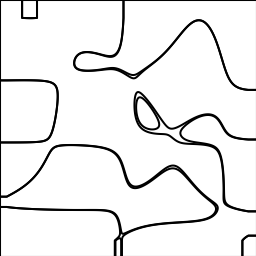

In [26]:
def convert_pop_to_mesh(pops):
    # interpolates population to gradient mesh, can see some improvement
    f = scipy.interpolate.interp2d(pops[0],pops[1],pops[2],kind='quintic')
    x = y = np.arange(0,1024,.5)
    znew = f(x,y)
    return znew

# generate population iterator
iterator = generate_gradient()

# make sure output image is fixed in size
(w, h) = (256/my_dpi, 256/my_dpi)

my_dpi=96

#generate figures

fig = plt.figure(figsize=(256/my_dpi, 256/my_dpi), frameon=False, dpi=my_dpi)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.set_xlim(( 0, 1024))
ax.set_ylim((0, 1024))

# obtain a potential surface 
znew = convert_pop_to_mesh(next(iterator))

# draw two contour lines
line = ax.contour(znew,levels=[5,100], colors='k')


# walk through iterations of surface animation and redraw:
def animate(i):
    pops = next(iterator)
    znew = convert_pop_to_mesh(next(iterator))
    ax.clear()
    line = ax.contour(znew,levels=[5,100], colors='k')
    if True: 
        #ax.axis('off')
        #fig.tight_layout()
        fig.savefig('../image_out/frame_%04d.png' % i) # outputs png frames for conversion with pix2pix
    #return line

In [27]:
# automate animation
anim = animation.FuncAnimation(fig, animate,
                               frames=500, repeat=False)


In [28]:
# start animation
animate(0)